### Deep learning in Python - Franchois Chollet - Chapter - 1
This notebooks is a practice codes from Franchois Chollet book & Notes.

MNIST dataset - digit recogniztion using CNN classification model using Keras. Keras comes pre loaded with MNIST datasets as four numpy arrays.

In [1]:
import keras
keras.__version__

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.5'

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
print(type(train_images))

<class 'numpy.ndarray'>


In [6]:
len(train_images)

60000

In [7]:
len(train_labels)

60000

In [8]:
len(test_images)

10000

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

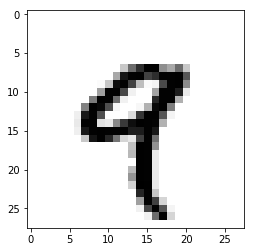

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train_images[4], cmap=plt.cm.binary)
plt.show()

In [11]:
from keras import models
from keras import layers

In [12]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [14]:
train_images.shape

(60000, 784)

In [15]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
network.compile(optimizer='rmsprop',
                           loss = 'categorical_crossentropy',
                           metrics=['accuracy'])

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2566 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.1040 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0674 - acc: 0.9801
Epoch 4/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0496 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.0377 - acc: 0.9885


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 63us/step


In [19]:
print(test_acc)

0.9801


In [23]:
import pydot

In [24]:
import graphviz

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.